# PCA (Core) / Elida Peña
**Reducción de Dimensionalidad**

**Descripción:**

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


**Objetivo:**

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

**Instrucciones:**

**1. Carga de datos:**
  – Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
  – El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

**2. Exploración y preprocesamiento de datos:**
  – Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
  – Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

**3. Aplicación de PCA:**
  – Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
  – Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

**4. Interpretación de los componentes principales:**
  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
  – Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

**5. Visualización y comparación:**
  – Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
  – Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

**Análisis de Resultados:**

  – Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
  – Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.


**Conclusión:**

  – Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

In [20]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/winequality-red.csv"
df_wine  = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_wine.head())

print("\nDescripción estadística básica:")
print(df_wine.describe())  # Estadísticas básicas del dataset.

Primeras 5 filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8  

In [12]:
print("\nInformación del dataset:")
print(df_wine.info()) 


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [14]:
# Verificar si hay valores nulos
print("\nValores nulos en el dataset:")
print(df_wine.isnull().sum())


Valores nulos en el dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [15]:
# Mostrar las columnas (nombres de las variables) del dataset
print("Variables en el dataset:")
print(df_wine.columns.tolist())


Variables en el dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']



Distribuciones de las variables:


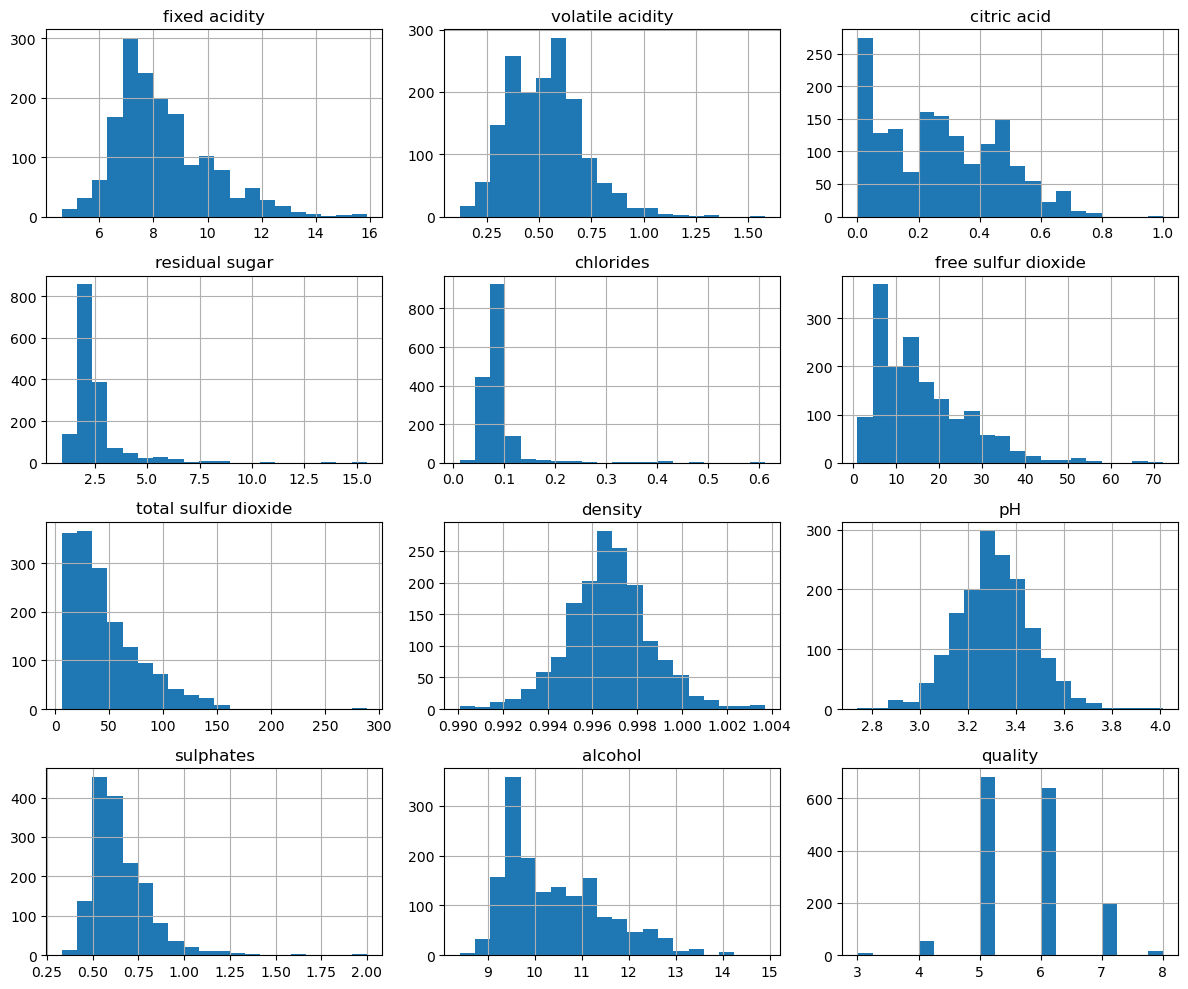

In [17]:
# Visualización de las distribuciones de las variables
print("\nDistribuciones de las variables:")
df_wine.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


Boxplots de las variables para detectar valores atípicos:


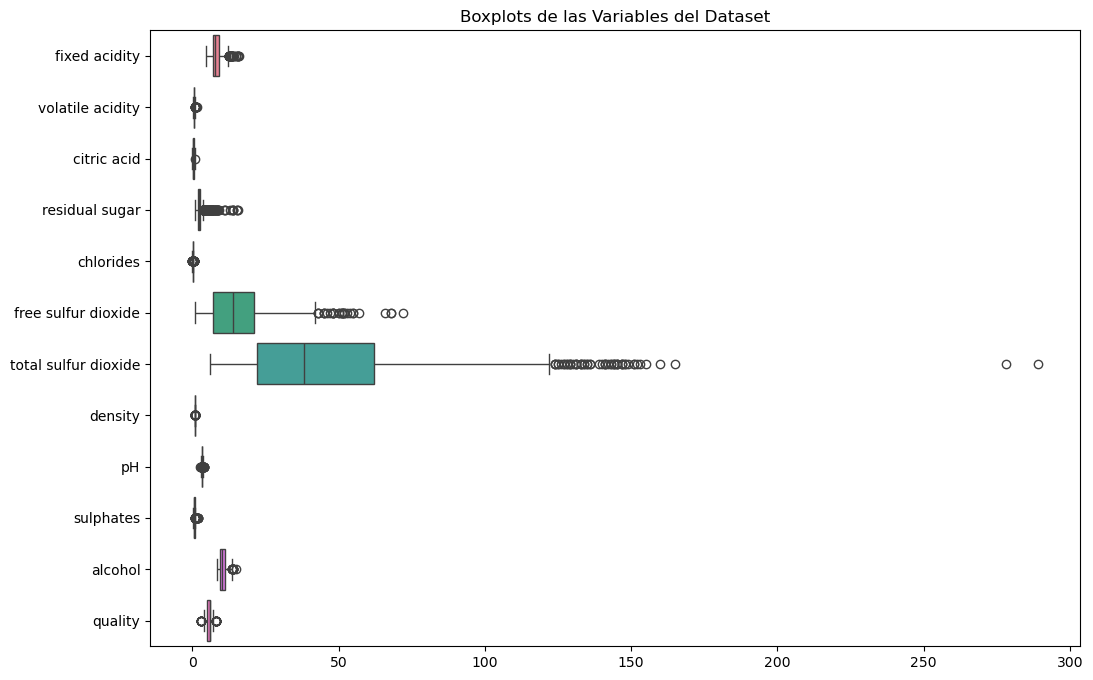

In [18]:
# Boxplots para identificar valores atípicos
print("\nBoxplots de las variables para detectar valores atípicos:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_wine, orient="h")
plt.title("Boxplots de las Variables del Dataset")
plt.show()

In [19]:
# 2. Normalización de las variables
# Seleccionamos las variables independientes (todas menos 'quality')
features = df_wine.drop(columns=['quality'])

# Aplicar StandardScaler para normalizar las variables
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Convertimos a DataFrame y mostramos las primeras filas
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)
print("\nPrimeras 5 filas de las variables normalizadas:")
print(df_normalized.head())


Primeras 5 filas de las variables normalizadas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alc

Número de componentes principales necesarios para capturar el 90% de la variabilidad: 7


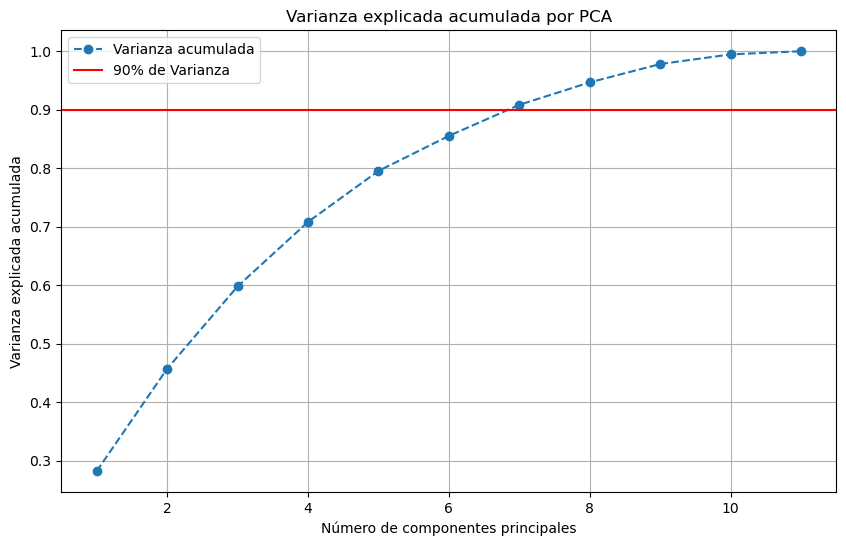

In [21]:
# 1. Aplicar PCA al dataset normalizado
pca = PCA()
pca_result = pca.fit_transform(features_normalized)

# 2. Calcular la varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 3. Determinar el número de componentes para capturar al menos el 90% de la varianza
num_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Número de componentes principales necesarios para capturar el 90% de la variabilidad: {num_components}")

# 4. Visualizar el gráfico de 'explained variance'
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', label='Varianza acumulada')
plt.axhline(y=0.9, color='r', linestyle='-', label='90% de Varianza')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.legend()
plt.grid()
plt.show()

Interpretación del Gráfico:
Varianza explicada acumulada:

El gráfico muestra cómo los componentes principales contribuyen a explicar la variabilidad total del dataset.
A medida que se agregan componentes, la varianza acumulada aumenta.
Línea roja del 90%:

La línea roja horizontal indica el umbral del 90% de la varianza explicada.
Según el gráfico, 7 componentes principales son suficientes para capturar el 90% de la variabilidad de los datos.
Conclusión:

En lugar de usar las 12 variables originales, puedes reducir el dataset a 7 componentes principales.
Esta reducción simplifica el análisis sin perder información significativa y hace que los modelos sean más eficientes.


Cargas de los componentes principales:
               fixed acidity  volatile acidity  citric acid  residual sugar  \
Componente 1        0.489314         -0.238584     0.463632        0.146107   
Componente 2       -0.110503          0.274930    -0.151791        0.272080   
Componente 3       -0.123302         -0.449963     0.238247        0.101283   
Componente 4       -0.229617          0.078960    -0.079418       -0.372793   
Componente 5       -0.082614          0.218735    -0.058573        0.732144   
Componente 6       -0.101479         -0.411449    -0.069593       -0.049156   
Componente 7        0.350227          0.533735    -0.105497       -0.290663   
Componente 8        0.177595          0.078775     0.377516       -0.299845   
Componente 9        0.194021         -0.129110    -0.381450        0.007523   
Componente 10      -0.249523          0.365925     0.621677        0.092872   
Componente 11       0.639691          0.002389    -0.070910        0.184030   

            

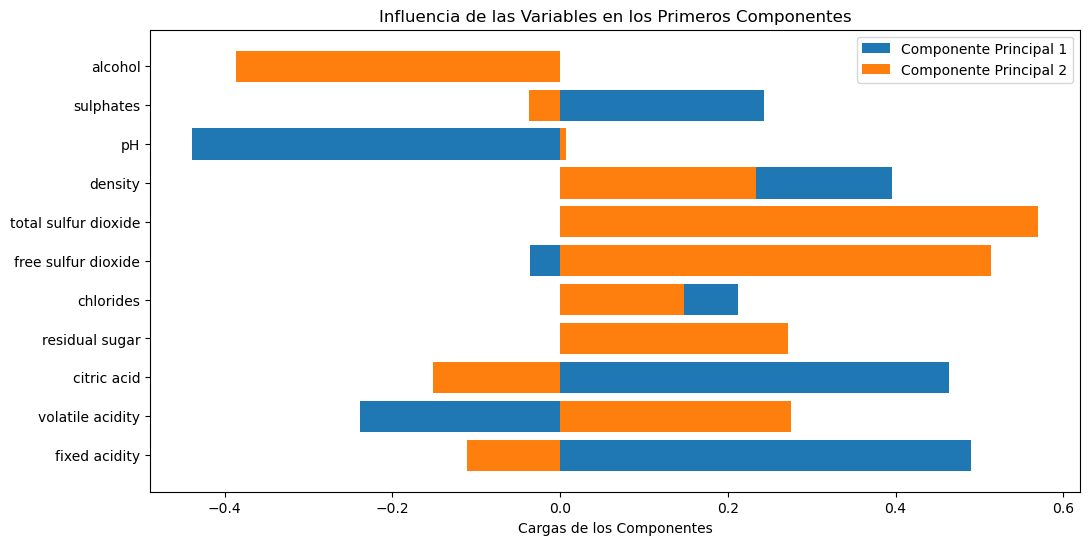

In [22]:
# Obtener los coeficientes (cargas) de los componentes principales
pca_components = pca.components_

# Crear un DataFrame con las cargas de los componentes principales
components_df = pd.DataFrame(
    pca_components,
    columns=features.columns,  # Las variables originales
    index=[f"Componente {i+1}" for i in range(len(pca_components))]
)

# Mostrar los primeros componentes principales y sus cargas
print("Cargas de los componentes principales:")
print(components_df)

# Visualizar la influencia de las variables en los primeros componentes principales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(components_df.columns, components_df.iloc[0], label="Componente Principal 1")
plt.barh(components_df.columns, components_df.iloc[1], label="Componente Principal 2")
plt.xlabel("Cargas de los Componentes")
plt.title("Influencia de las Variables en los Primeros Componentes")
plt.legend()
plt.show()

Utilidad del PCA

Simplificación: Al identificar las características más influyentes, PCA elimina la redundancia en los datos, facilitando su análisis.
Modelos Predictivos: Reducir el número de características ayuda a entrenar modelos más eficientes y con menos sobreajuste.
Comprensión del Dataset: Las variables seleccionadas como más influyentes en los primeros componentes permiten entender mejor qué factores químicos impactan en la calidad del vino.

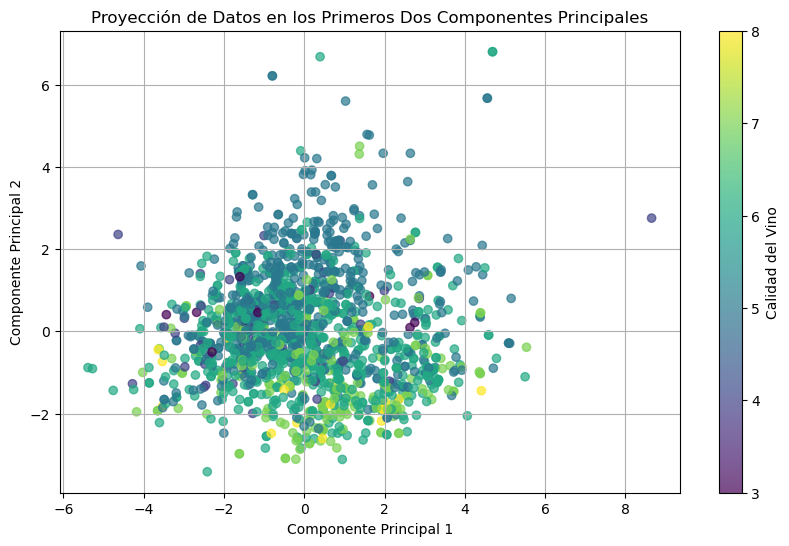

In [23]:
# Proyectar los datos en los primeros dos componentes principales
pca_2d = pca_result[:, :2]  # Solo tomamos las dos primeras columnas del resultado de PCA

# Visualizar el gráfico de dispersión con etiquetas de clase (calidad del vino)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df_wine['quality'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Calidad del Vino')
plt.title('Proyección de Datos en los Primeros Dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

En este gráfico de dispersión, cada punto representa un vino proyectado en el espacio definido por los dos primeros componentes principales obtenidos mediante PCA. Los colores de los puntos corresponden a la calidad del vino (valores entre 3 y 8), como se indica en la barra de colores a la derecha.
Conclusión
PCA ha demostrado ser una técnica efectiva para reducir la dimensionalidad del dataset del vino sin perder información relevante. Capturando el 90% de la variabilidad con 7 componentes principales, se pueden simplificar los datos, mejorar el rendimiento de los modelos predictivos y destacar las variables que más contribuyen a la calidad del vino.